<a href="https://colab.research.google.com/github/AmberLJC/FedScale/blob/master/dataset/Femnist_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Jupyter notebook] Understand the heterogeneous FL data.**

# Download the Femnist dataset and FedScale
Follow the download instruction in /content/FedScale/dataset/download.sh

In [ ]:
# Download Fedscale and femnist dataset 

!wget -O  /content/femnist.tar.gz https://fedscale.eecs.umich.edu/dataset/femnist.tar.gz
!tar -xf  /content/femnist.tar.gz -C /content/
!rm -f  /content/femnist.tar.gz
!echo -e "${GREEN}FEMNIST dataset downloaded!${NC}"        

--2022-03-27 18:01:54--  https://fedscale.eecs.umich.edu/dataset/femnist.tar.gz
Resolving fedscale.eecs.umich.edu (fedscale.eecs.umich.edu)... 141.212.113.214
Connecting to fedscale.eecs.umich.edu (fedscale.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342784457 (327M) [application/x-gzip]
Saving to: ‘/content/femnist.tar.gz’

/content/femnist.ta 100%[===================>] 326.90M   105MB/s    in 3.1s    

2022-03-27 18:01:57 (105 MB/s) - ‘/content/femnist.tar.gz’ saved [342784457/342784457]



In [ ]:
!git clone https://github.com/symbioticlab/fedscale

Cloning into 'FedScale'...
remote: Enumerating objects: 1765, done.
remote: Counting objects: 100% (728/728), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 1765 (delta 469), reused 440 (delta 244), pack-reused 1037
Receiving objects: 100% (1765/1765), 63.77 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (1052/1052), done.


In [ ]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

from fedscale.core.utils.femnist import FEMNIST
from fedscale.core.utils.utils_data import get_data_transform
from fedscale.core.utils.divide_data import DataPartitioner
from fedscale.core.argParser import args 


# Data Loader

In [ ]:

train_transform, test_transform = get_data_transform('mnist')
train_dataset = FEMNIST('/content/femnist', dataset='train', transform=train_transform)
test_dataset = FEMNIST('/content/femnist', dataset='test', transform=test_transform)


Partition the dataset by the `client_data_mapping` file, which gives the real-world client-level heterogeneoity.

In [ ]:

args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='/content/femnist/client_data_mapping/train.csv')
#testing_sets = DataPartitioner(data=test_dataset, args=args, numOfClass=62, isTest=True)
#testing_sets.partition_data_helper(num_clients=None, data_map_file='/content/femnist/client_data_mapping/train.csv')


# Print and plot statistics of the dataset.

In [ ]:
print(f'Total number of data smaples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')
print(f'The number of data smaples of each clients: {training_sets.getSize()}')
print(f'The number of unique labels of each clients: {training_sets.getClientLabel()}')


Total number of data smaples: 637877
Total number of clients: 2800
The number of data smaples of each clients: {'size': [299, 151, 335, 157, 181, 354, 180, 179, 126, 161, 351, 159, 165, 169, 301, 143, 148, 333, 375, 170, 152, 308, 277, 171, 142, 173, 146, 332, 259, 292, 181, 151, 159, 50, 169, 157, 176, 168, 168, 181, 246, 47, 177, 413, 230, 221, 121, 155, 365, 179, 159, 167, 174, 167, 178, 171, 152, 242, 166, 175, 165, 180, 344, 414, 19, 173, 423, 164, 404, 305, 135, 176, 279, 179, 246, 177, 323, 248, 173, 172, 31, 176, 164, 173, 228, 271, 169, 404, 437, 273, 274, 157, 177, 169, 378, 141, 207, 176, 172, 151, 164, 163, 315, 173, 177, 311, 376, 287, 185, 96, 238, 379, 437, 222, 168, 408, 167, 353, 383, 176, 150, 393, 175, 176, 183, 145, 391, 374, 321, 331, 333, 178, 158, 177, 344, 183, 176, 149, 178, 342, 267, 325, 170, 168, 127, 161, 249, 182, 164, 269, 170, 117, 150, 367, 257, 244, 175, 149, 169, 164, 179, 316, 112, 169, 169, 132, 160, 169, 174, 176, 157, 330, 175, 243, 259, 169, 212,

Text(0.5, 1.0, 'Client label distribution')

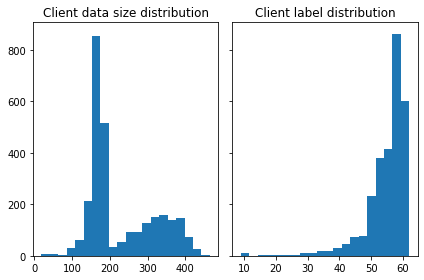

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']
 
n_bins = 20
axs[0].hist(size_dist, bins=n_bins) 
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins) 
axs[1].set_title('Client label distribution')


# Visiualize the clients' data.


In [ ]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

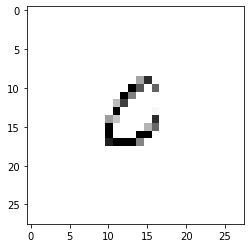

In [ ]:
for data in iter(dataloader):
    plt.imshow(np.transpose(data[0][0].numpy(), (1, 2, 0)))
    break
